In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
import h5py
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sys import getsizeof

In [ ]:
path = '/content/drive/MyDrive/IITMComp/Alpha-10-train'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


classes_count = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'Hello': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'Mynameis': 0, 'N': 0, 'Namaste': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'Sorry': 0, 'T': 0, 'Team': 0, 'Thankyou': 0, 'U': 0, 'V': 0, 'W': 0, 'We': 0, 'Welcome': 0, 'World': 0, 'X': 0, 'Y': 0, 'Z': 0}

In [ ]:
def data_load(path,train_split):
    global input_per_sequence,length_of_sequence
    # dir= glob.glob(path + '/tctodd12')
    
    # print(dir)
    time_steps = []
    X_data = [] # data
    Y_data = [] # labels

    np.random.seed(101)
    for file in os.listdir(path):
          print(file)
          class_name = file.split('_')[0]
  #             print(file.split('_'))
          
          
          arr = np.genfromtxt(path + '/' + file, delimiter='/')
          arr = np.delete(arr, -1, axis=1) # chopping last index in all rows
          arr = np.delete(arr, 0, axis=1) # chopping 1st index in all rows
          # arr = np.delete(arr, 0, axis=1) # chopping 1st index in all rows

          for i in range(0,len(arr)-1,2):
              arr_n =  np.append(arr[i],arr[i+1])
              classes_count[class_name]+=1
              X_data.append(arr_n)
              Y_data.append(class_name)

    for a in range(len(X_data)):
        for k in range(0,2):
          X_data[a][k] = (X_data[a][k])/360
        for k in range(2,7):
          X_data[a][k] /= 1023
        for k in range(7,9):
          X_data[a][k] = (X_data[a][k])/360
        for k in range(9,14):
          X_data[a][k] /= 1023
    

              
    # return X_data,X_data,Y_data,Y_data

    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data,train_size=train_split,stratify=Y_data,random_state=101)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    
    
    # return np.array(X_data),Y_data
    return X_train, X_test, Y_train, Y_test


In [ ]:
#loading dataset
X_train, X_test, Y_train, Y_test = data_load(path,0.8)
# # one hot encoding
le = preprocessing.LabelEncoder()
le.fit(Y_train)
Y_train = to_categorical(le.transform(Y_train))
Y_test = to_categorical(le.transform(Y_test))


Thankyou_train_1.txt
Sorry_train_1.txt
Hello_train_1.txt
Namaste_train_1.txt
We_train_1.txt
Welcome_train_1.txt
Welcome_train_2.txt
We_train_2.txt
Namaste_train_2.txt
Hello_train_2.txt
Sorry_train_2.txt
Thankyou_train_2.txt
Thankyou_train_3.txt
Sorry_train_3.txt
Welcome_train_3.txt
We_train_3.txt
Namaste_train_3.txt
Hello_train_3.txt
Hello_train_4.txt
Thankyou_train_4.txt
Sorry_train_4.txt
We_train_4.txt
Welcome_train_4.txt
Namaste_train_4.txt
Namaste_train_5.txt
Hello_train_5.txt
We_train_5.txt
Welcome_train_5.txt
Sorry_train_5.txt
Thankyou_train_5.txt
Sorry_train_6.txt
Hello_train_6.txt
Thankyou_train_6.txt
We_train_6.txt
Welcome_train_6.txt
Namaste_train_6.txt
Namaste_train_7.txt
Sorry_train_7.txt
Welcome_train_7.txt
We_train_7.txt
Thankyou_train_7.txt
Hello_train_7.txt
Hello_train_8.txt
Namaste_train_8.txt
Thankyou_train_8.txt
Sorry_train_8.txt
We_train_8.txt
Welcome_train_8.txt
Welcome_train_9.txt
We_train_9.txt
Namaste_train_9.txt
Thankyou_train_9.txt
Sorry_train_9.txt
Hello_trai

In [ ]:
df = pd.DataFrame(X_train, columns = ['left_Roll','left_Pitch','left_flex_1','left_flex_2','left_flex_3','left_flex_4','left_flex_5','right_Roll','right_Pitch','right_flex_1','right_flex_2','right_flex_3','left_flex_4','left_flex_5'])
df.head(20)

,left_Roll,left_Pitch,left_flex_1,left_flex_2,left_flex_3,left_flex_4,left_flex_5,right_Roll,right_Pitch,right_flex_1,right_flex_2,right_flex_3,left_flex_4,left_flex_5
0,0.627778,0.525000,0.095797,0.191593,0.267840,0.334311,0.210166,0.416667,0.486111,0.207234,0.227761,0.465298,0.318671,0.302053
1,0.675000,0.322222,0.219941,0.233627,0.373412,0.404692,0.256109,0.536111,0.455556,0.203324,0.255132,0.534702,0.448680,0.321603
2,0.630556,0.347222,0.208211,0.284457,0.458456,0.463343,0.336266,0.538889,0.563889,0.262952,0.268817,0.557185,0.490714,0.225806
3,0.586111,0.402778,0.239492,0.222874,0.275660,0.378299,0.239492,0.575000,0.422222,0.257087,0.266862,0.497556,0.404692,0.345064
4,0.450000,0.475000,0.237537,0.311828,0.497556,0.552297,0.371457,0.555556,0.444444,0.278592,0.265885,0.552297,0.442815,0.260020
5,0.452778,0.491667,0.254154,0.252199,0.481916,0.485826,0.338221,0.525000,0.538889,0.196481,0.151515,0.414467,0.260997,0.150538
6,0.594444,0.472222,0.197458,0.257087,0.440860,0.448680,0.326491,0.550000,0.472222,0.225806,0.220919,0.530792,0.458456,0.187683
7,0.450000,0.516667,0.252199,0.276637,0.493646,0.520039,0.351906,0.541667,0.561111,0.273705,0.254154,0.544477,0.452590,0.240469
8,0.494444,0.458333,0.188661,0.210166,0.000000,0.384164,0.266862,0.472222,0.502778,0.202346,0.212121,0.406647,0.323558,0.329423
9,0.588889,0.469444,0.222874,0.259042,0.434995,0.436950,0.334311,0.555556,0.486111,0.237537,0.235582,0.547410,0.484848,0.187683


In [ ]:
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_dict)

{'A': 0, 'H': 1, 'Hello': 2, 'L': 3, 'Namaste': 4, 'Sorry': 5, 'Thankyou': 6, 'We': 7, 'Welcome': 8, 'World': 9}


In [ ]:
classes_count

{'A': 1000,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 1000,
 'Hello': 1000,
 'I': 0,
 'J': 0,
 'K': 0,
 'L': 1000,
 'M': 0,
 'Mynameis': 0,
 'N': 0,
 'Namaste': 1000,
 'O': 0,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 0,
 'Sorry': 1000,
 'T': 0,
 'Team': 0,
 'Thankyou': 1000,
 'U': 0,
 'V': 0,
 'W': 0,
 'We': 1000,
 'Welcome': 1000,
 'World': 1000,
 'X': 0,
 'Y': 0,
 'Z': 0}

In [ ]:
print(X_train[0],len(X_train[0]))
print(Y_train[0])

[0.62777778 0.525      0.09579668 0.19159335 0.26783969 0.33431085
 0.21016618 0.41666667 0.48611111 0.20723363 0.22776149 0.46529814
 0.31867058 0.30205279] 14
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 14)
(2000, 14)
(8000, 10)
(2000, 10)


In [ ]:
Y_train.dtype

dtype('float32')

In [ ]:
# def my_model():
    
#     inputs= keras.Input(shape=(X_train.shape[1]))   #(batch_size, timesteps, input_dim).
#     x = layers.Dense(120,activation = "tanx")(inputs)
#     outputs = layers.Dense(Y_train.shape[1],activation = "softmax")(x)
#     model = keras.Model(inputs = inputs,outputs = outputs)
#     return model
# model = my_model()

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(X_train.shape[1])),
  tf.keras.layers.Dense(256, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(50, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(Y_train.shape[1],activation="softmax")
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               3840      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                6450      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [ ]:

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
     optimizer = keras.optimizers.Adam(lr = 0.001),
     metrics = ["accuracy"]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),batch_size = 32, epochs = 1000, verbose = 2 ) #

Epoch 1/1000
250/250 - 2s - loss: 1.7902 - accuracy: 0.3676 - val_loss: 1.0013 - val_accuracy: 0.8230 - 2s/epoch - 6ms/step
Epoch 2/1000
250/250 - 1s - loss: 0.8437 - accuracy: 0.7199 - val_loss: 0.4711 - val_accuracy: 0.9265 - 624ms/epoch - 2ms/step
Epoch 3/1000
250/250 - 1s - loss: 0.5229 - accuracy: 0.8487 - val_loss: 0.3070 - val_accuracy: 0.9435 - 627ms/epoch - 3ms/step
Epoch 4/1000
250/250 - 1s - loss: 0.4003 - accuracy: 0.8879 - val_loss: 0.2514 - val_accuracy: 0.9570 - 615ms/epoch - 2ms/step
Epoch 5/1000
250/250 - 1s - loss: 0.3590 - accuracy: 0.9041 - val_loss: 0.2061 - val_accuracy: 0.9655 - 602ms/epoch - 2ms/step
Epoch 6/1000
250/250 - 1s - loss: 0.3091 - accuracy: 0.9231 - val_loss: 0.2027 - val_accuracy: 0.9550 - 625ms/epoch - 3ms/step
Epoch 7/1000
250/250 - 1s - loss: 0.2789 - accuracy: 0.9290 - val_loss: 0.1755 - val_accuracy: 0.9670 - 527ms/epoch - 2ms/step
Epoch 8/1000
250/250 - 1s - loss: 0.2559 - accuracy: 0.9408 - val_loss: 0.1503 - val_accuracy: 0.9695 - 531ms/epoc

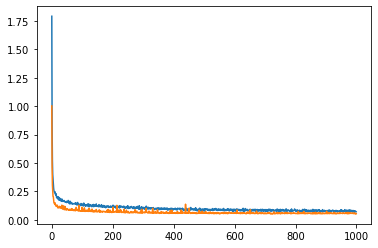

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.show()

In [ ]:
print("Training Loss and Accuracy")
model.evaluate(X_train,Y_train)
print("Testing Loss and Accuracy")
model.evaluate(X_test,Y_test)

Training Loss and Accuracy
250/250 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.9914
Testing Loss and Accuracy
63/63 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9880


[0.053919535130262375, 0.9879999756813049]

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.99      1.00       200
           2       0.98      0.99      0.99       200
           3       0.99      0.99      0.99       200
           4       0.99      0.99      0.99       200
           5       0.99      0.98      0.98       200
           6       0.98      0.99      0.99       200
           7       0.97      0.97      0.97       200
           8       0.99      0.94      0.97       200
           9       0.99      0.99      0.99       200

   micro avg       0.99      0.99      0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000
 samples avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("/content/drive/MyDrive/IITMComp/cur_model/alpha_16.pb")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/IITMComp/cur_model/alpha_16.pb/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/IITMComp/cur_model/alpha_16.pb/assets


In [ ]:
# tflite model conversion
def representative_data_gen():
  for input_value in X_train.take(100):
    yield [input_value]

#TFLite model conversion

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model_quant = converter.convert()

# Save the model to disk
open('/content/drive/MyDrive/IITMComp/cur_model/alpha_16_small_11_classes_1.tflite', "wb").write(tflite_model_quant)

INFO:tensorflow:Assets written to: /tmp/tmpf3n0k6ni/assets


INFO:tensorflow:Assets written to: /tmp/tmpf3n0k6ni/assets


49408

#TESTING model with new data

In [ ]:
path1 = '/content/drive/MyDrive/IITMComp/Alpha-10-test'

In [ ]:
def data_load_test(path):
    global input_per_sequence,length_of_sequence
    # dir= glob.glob(path + '/tctodd12')
    
    # print(dir)
    time_steps = []
    X_data = [] # data
    Y_data = [] # labels

    np.random.seed(101)
    count = 0
    for file in os.listdir(path):
        class_name = file.split('_')[0]
        if classes_count[class_name] > 0: 
          count+=1
          print(file)
          arr = np.genfromtxt(path + '/' + file, delimiter='/')
          arr = np.delete(arr, -1, axis=1) # chopping last index in all rows
          arr = np.delete(arr, 0, axis=1) # chopping 1st index in all rows
          # arr = np.delete(arr, 0, axis=1) # chopping 1st index in all rows
          for i in range(0,len(arr)-1,2):
            arr_n =  np.append(arr[i],arr[i+1])
            X_data.append(arr_n)
            Y_data.append(class_name)
      
            


    # for a in range(len(X_data)):
    #     for k in range(0,3):
    #       X_data[a][k] /= 360
    #     for k in range(3,8):
    #       X_data[a][k] /= 1023
    #     for k in range(8,11):
    #       X_data[a][k] /= 360
    #     for k in range(11,16):
    #       X_data[a][k] /= 1023
    for a in range(len(X_data)):
        for k in range(0,2):
          X_data[a][k] = (X_data[a][k])/360
        for k in range(2,7):
          X_data[a][k] /= 1023
        for k in range(7,9):
          X_data[a][k] = (X_data[a][k])/360
        for k in range(9,14):
          X_data[a][k] /= 1023
    X_data = np.array(X_data)
    print(count)
    
    
    
    
    return X_data,Y_data

In [ ]:
#loading dataset
X1_test, Y1_test = data_load_test(path1)
Y1_test = to_categorical(le.transform(Y1_test))

A_test.txt
L_test.txt
H_test.txt
World_test.txt
We_test.txt
Welcome_test.txt
Hello_test.txt
Namaste_test.txt
Thankyou_test.txt
Sorry_test.txt
10


In [ ]:
model.evaluate(X1_test,Y1_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9820


[0.08595943450927734, 0.9819999933242798]

#TFLITE testing


In [ ]:
classes_count = {'A': 0, 'H': 1, 'Hello': 2, 'I': 3, 'M': 4, 'Mynameis': 5, 'N': 6, 'Namaste': 7, 'O': 8, 'R': 9, 'S': 10, 'Sorry': 11, 'T': 12, 'Team': 13, 'Thankyou': 14, 'W': 15, 'We': 16, 'Welcome': 17, 'World': 18,'L':19}
for i in classes_count:
  classes_count[i] = [0]

In [ ]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/IITMComp/cur_model/alpha_16_small_11_classes_1.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

# input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
correct = 0
total = 0
for i in range(len(X1_test)):
  input_data = [X1_test[i]]
  input_data = np.array(input_data)
  input_data = input_data.astype("float32")

  # print(input_data)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()

  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
  output_data = interpreter.get_tensor(output_details[0]['index'])
  f = list(le_dict.keys())
  classes_count[f[np.argmax(Y1_test[i])]].append(f[ np.argmax(np.round(output_data)[0])])
  if np.argmax(np.round(output_data)[0]) == np.argmax(Y1_test[i]):
      # print(1)
      
      # print(f[0])
      classes_count[f[np.argmax(Y1_test[i])]][0]+=1
      
      correct += 1
  # else:
      # print(np.argmax(np.round(output_data)[0]),np.argmax(Y1_test[i]))
  total+=1
  # print(np.round(output_data),Y1_test[i])
  # print(np.argmax(np.round(output_data)[0]),np.argmax(Y1_test[i]))
print("accuracy of tflite:",correct/total)


accuracy of tflite: 0.976


In [ ]:

# for i in classes_count:
#   print(i)
#   print(classes_count[i])

In [ ]:
# for i in range(70,73):
#   print("data :",X1_test[i])
#   print("output :",Y1_test[i])

In [ ]:

k = {'A': 0, 'H': 1, 'Hello': 2, 'I': 3, 'M': 4, 'Mynameis': 5, 'N': 6, 'Namaste': 7, 'O': 8, 'R': 9, 'S': 10, 'Sorry': 11, 'T': 12, 'Team': 13, 'Thankyou': 14, 'W': 15, 'We': 16, 'Welcome': 17, 'World': 18}

In [ ]:
# k.keys()
# print("{")
# for i in k.keys():
  
#   print("\""+i+ "\""+",")
# print("}")